In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath(".."))
import warnings

from src.text_cleaning import clean_text_wordcloud_lda
from src.wordcloud import remove_stopwords_and_short_wordcloud
from wordcloud import WordCloud, get_single_color_func

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/3_results/reviews_with_sentiment.csv")
df

,reviewer,year,original_language,content,hospital,clean_for_sentiment,vader_positive,vader_neutral,vader_negative,vader_compound,vader_sentiment,distilbert_label,distilbert_score
0,m555,2025,English,I had an ivf consultation with a female Prof. ...,UZ Brussel,i had an ivf consultation with a female prof. ...,0.040,0.889,0.071,-0.7267,negative,negative,0.999486
1,Joan Rangel,2025,Spanish,Excellent hospital!! I recommend it.,UZ Brussel,excellent hospital!! i recommend it.,0.693,0.307,0.000,0.7772,positive,positive,0.999808
2,juvo92,2025,Dutch,Friendly doctors and nurses. I don't really un...,UZ Brussel,friendly doctors and nurses. i don't really un...,0.189,0.592,0.219,-0.1280,neutral,negative,0.986611
3,LC,2025,French,I went to UZ Brussel in 2020 for egg cryoprese...,UZ Brussel,i went to uz brussel in 2020 for egg cryoprese...,0.045,0.835,0.120,-0.9797,negative,negative,0.999744
4,jutta henckaerts,2025,Dutch,The emergency department is horrible. If there...,UZ Brussel,the emergency department is horrible. if there...,0.076,0.744,0.180,-0.8126,negative,negative,0.995120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,Line VAN DOOREN,2014,Dutch,good connection top Uza,UZ Antwerpen,good connection top uza,0.701,0.299,0.000,0.5719,positive,positive,0.999867
1826,Irene von Birgelen,2013,Dutch,"Thanks to the UZA, we have already added 5 yea...",UZ Antwerpen,"thanks to the uza, we have already added 5 yea...",0.195,0.805,0.000,0.4404,positive,positive,0.995856
1827,Sofie L'Eau,2013,Dutch,Incompetent nurses and an ombudsman service wh...,UZ Antwerpen,incompetent nurses and an ombudsman service wh...,0.089,0.662,0.248,-0.5859,negative,negative,0.999505
1828,Robertina Van Damme,2013,Dutch,Be pampered again by Frank kine :-),UZ Antwerpen,be pampered again by frank kine :-),0.277,0.723,0.000,0.3182,positive,negative,0.989193


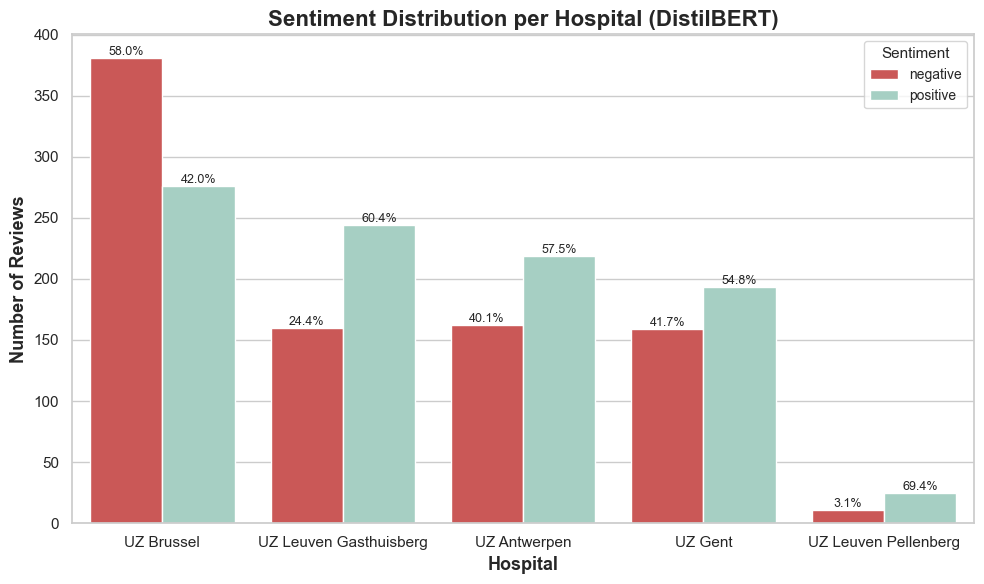

In [4]:
sentiment_counts_distilbert = df.groupby(['hospital', 'distilbert_label']).size().reset_index(name='count')
total_counts_distilbert = sentiment_counts_distilbert.groupby('hospital')['count'].sum().to_dict()
hospital_order_distilbert = df['hospital'].value_counts().index.tolist()

sns.set(style="whitegrid")

custom_palette = {
    'negative': '#DD4544',
    'neutral':  '#E6C358',
    'positive': '#9FD6C6'
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=sentiment_counts_distilbert,
    x='hospital',
    y='count',
    hue='distilbert_label',
    palette=custom_palette,
    order=hospital_order_distilbert
)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            continue
        hospital_name = bar.get_x() + bar.get_width() / 2.0
        hospital_index = int(bar.get_x() + bar.get_width() / 2.0)
        hospital_label = bar.get_x() + bar.get_width() / 2.0
        hospital = ax.get_xticklabels()[int(bar.get_x() + bar.get_width() / 2.0)].get_text()
        total = total_counts_distilbert.get(hospital, 1)
        percentage = f"{(height / total * 100):.1f}%"
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            percentage,
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Sentiment Distribution per Hospital (DistilBERT)", fontsize=16, fontweight='bold', family='sans-serif')
plt.xlabel("Hospital", fontsize=13, fontweight='bold', family='sans-serif')
plt.ylabel("Number of Reviews", fontsize=13, fontweight='bold', family='sans-serif')
plt.legend(title="Sentiment", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

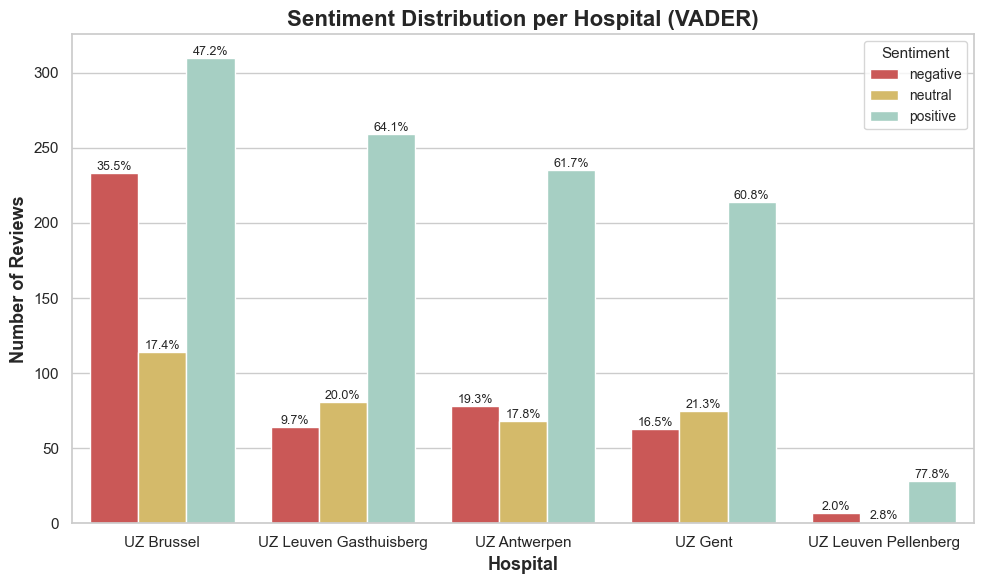

In [5]:
sentiment_counts_vader = df.groupby(['hospital', 'vader_sentiment']).size().reset_index(name='count')
total_counts_vader = sentiment_counts_vader.groupby('hospital')['count'].sum().to_dict()
hospital_order_distilbert = df['hospital'].value_counts().index.tolist()

sns.set(style="whitegrid")

custom_palette = {
    'negative': '#DD4544',
    'neutral':  '#E6C358',
    'positive': '#9FD6C6'
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=sentiment_counts_vader,
    x='hospital',
    y='count',
    hue='vader_sentiment',
    palette=custom_palette,
    order=hospital_order_distilbert
)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            continue
        hospital_name = bar.get_x() + bar.get_width() / 2.0
        hospital_index = int(bar.get_x() + bar.get_width() / 2.0)
        hospital_label = bar.get_x() + bar.get_width() / 2.0
        hospital = ax.get_xticklabels()[int(bar.get_x() + bar.get_width() / 2.0)].get_text()
        total = total_counts_vader.get(hospital, 1)
        percentage = f"{(height / total * 100):.1f}%"
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            percentage,
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Sentiment Distribution per Hospital (VADER)", fontsize=16, fontweight='bold', family='sans-serif')
plt.xlabel("Hospital", fontsize=13, fontweight='bold', family='sans-serif')
plt.ylabel("Number of Reviews", fontsize=13, fontweight='bold', family='sans-serif')
plt.legend(title="Sentiment", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

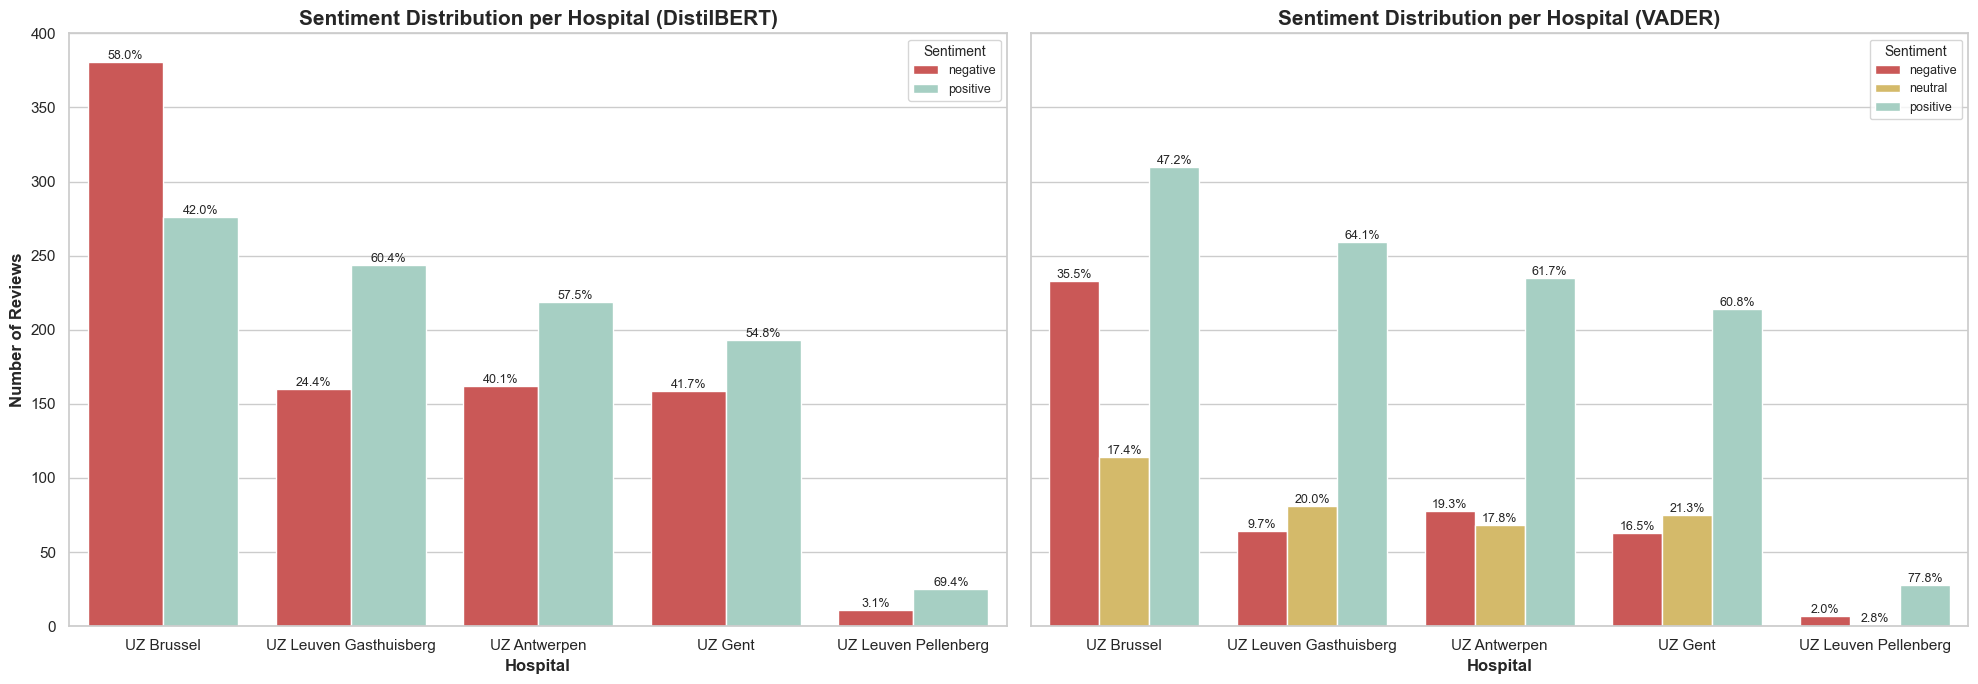

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prep data
sentiment_counts_distilbert = df.groupby(['hospital', 'distilbert_label']).size().reset_index(name='count')
total_counts_distilbert = sentiment_counts_distilbert.groupby('hospital')['count'].sum().to_dict()

sentiment_counts_vader = df.groupby(['hospital', 'vader_sentiment']).size().reset_index(name='count')
total_counts_vader = sentiment_counts_vader.groupby('hospital')['count'].sum().to_dict()

hospital_order = df['hospital'].value_counts().index.tolist()

custom_palette = {
    'negative': '#DD4544',
    'neutral':  '#E6C358',
    'positive': '#9FD6C6'
}

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

# ----- DistilBERT plot -----
sns.barplot(
    data=sentiment_counts_distilbert,
    x='hospital',
    y='count',
    hue='distilbert_label',
    palette=custom_palette,
    order=hospital_order,
    ax=axes[0]
)

# Annotate percentages
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            continue
        hospital = axes[0].get_xticklabels()[int(bar.get_x() + bar.get_width() / 2.0)].get_text()
        total = total_counts_distilbert.get(hospital, 1)
        percentage = f"{(height / total * 100):.1f}%"
        axes[0].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            percentage,
            ha='center',
            va='bottom',
            fontsize=9
        )

axes[0].set_title("Sentiment Distribution per Hospital (DistilBERT)", fontsize=15, fontweight='bold')
axes[0].set_xlabel("Hospital", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Number of Reviews", fontsize=12, fontweight='bold')
axes[0].legend(title="Sentiment", fontsize=9, title_fontsize=10)

# ----- VADER plot -----
sns.barplot(
    data=sentiment_counts_vader,
    x='hospital',
    y='count',
    hue='vader_sentiment',
    palette=custom_palette,
    order=hospital_order,
    ax=axes[1]
)

for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            continue
        hospital = axes[1].get_xticklabels()[int(bar.get_x() + bar.get_width() / 2.0)].get_text()
        total = total_counts_vader.get(hospital, 1)
        percentage = f"{(height / total * 100):.1f}%"
        axes[1].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            percentage,
            ha='center',
            va='bottom',
            fontsize=9
        )

axes[1].set_title("Sentiment Distribution per Hospital (VADER)", fontsize=15, fontweight='bold')
axes[1].set_xlabel("Hospital", fontsize=12, fontweight='bold')
axes[1].set_ylabel("")  # share y
axes[1].legend(title="Sentiment", fontsize=9, title_fontsize=10)

# Global styling
plt.tight_layout()
plt.show()

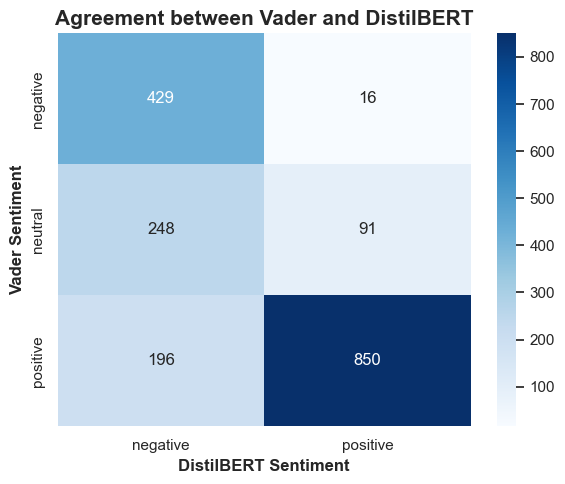

In [6]:
confusion_matrix = pd.crosstab(df['vader_sentiment'], df['distilbert_label'])

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Agreement between Vader and DistilBERT", fontsize=15, fontweight='bold', family='sans-serif')
plt.xlabel("DistilBERT Sentiment", fontsize=12, fontweight='bold', family='sans-serif')
plt.ylabel("Vader Sentiment", fontsize=12, fontweight='bold', family='sans-serif')
plt.tight_layout()
plt.show()

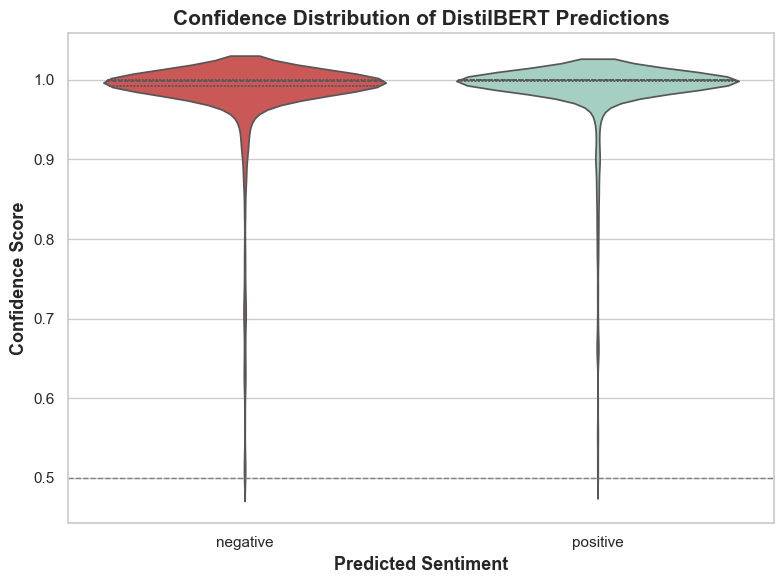

In [7]:
sns.set(style="whitegrid")

custom_palette = {
    'negative': '#DD4544',
    'neutral':  '#E6C358',
    'positive': '#9FD6C6'
}

plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    data=df,
    x='distilbert_label',
    y='distilbert_score',
    hue='distilbert_label',   
    palette=custom_palette,
    inner='quartile',
    legend=False   
)

plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)

plt.title("Confidence Distribution of DistilBERT Predictions", fontsize=15, fontweight='bold', family='sans-serif')
plt.xlabel("Predicted Sentiment", fontsize=13, fontweight='bold', family='sans-serif')
plt.ylabel("Confidence Score", fontsize=13, fontweight='bold', family='sans-serif')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [8]:
custom_stopwords_wordcloud = set([
    'also', 'already', 'always', 'another', 'antwerp', 'antwerpen', 'appointment', 'ask', 'asked', 
    'belgium', 'best', 'brussel', 'brussels', 'call', 'called', 'came', 'come', 'consultation', 
    'day', 'department', 'didnt', 'doctor', 'doctors', 'dont', 'dr', 'emergency', 'even', 'everything', 
    'experience', 'gasthuisberg', 'gent', 'ghent', 'go', 'good', 'heilig hart', 'hospital', 
    'hospitals', 'leuven', 'never', 'nurse', 'nurses', 'one', 'operation', 'patient', 'patients', 
    'people', 'really', 'room', 'said', 'say', 'service', 'staff', 'still', 'surgery', 'take', 'time', 
    'told', 'treatment', 'uz', 'uza', 'well', 'went', 'with', 'without'
])

def get_text(hospital, sentiment, custom_stopwords_wordcloud):
    df['clean_for_wordcloud'] = df['content'].apply(clean_text_wordcloud_lda)
    df['clean_for_wordcloud'] = df['clean_for_wordcloud'].apply(
        lambda x: remove_stopwords_and_short_wordcloud(x, custom_stopwords_wordcloud)
        )
    subset = df[(df['hospital'] == hospital) & (df['distilbert_label'] == sentiment)]
    text = " ".join(subset['clean_for_wordcloud'].tolist())
    return text

def single_color_func(color_hex):
    def color_func(*args, **kwargs):
        return color_hex
    return color_func

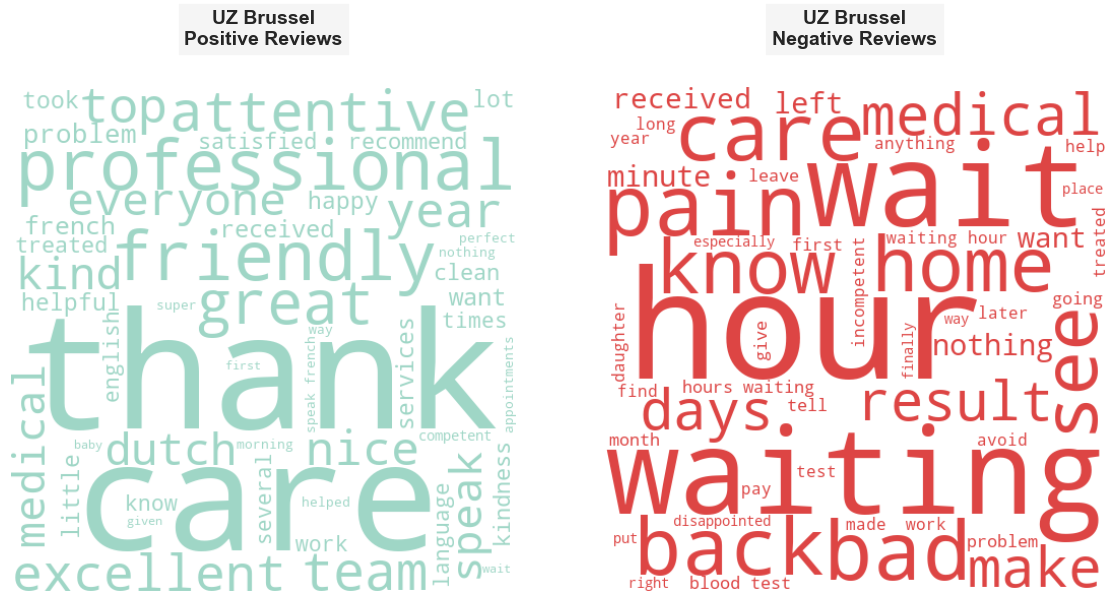

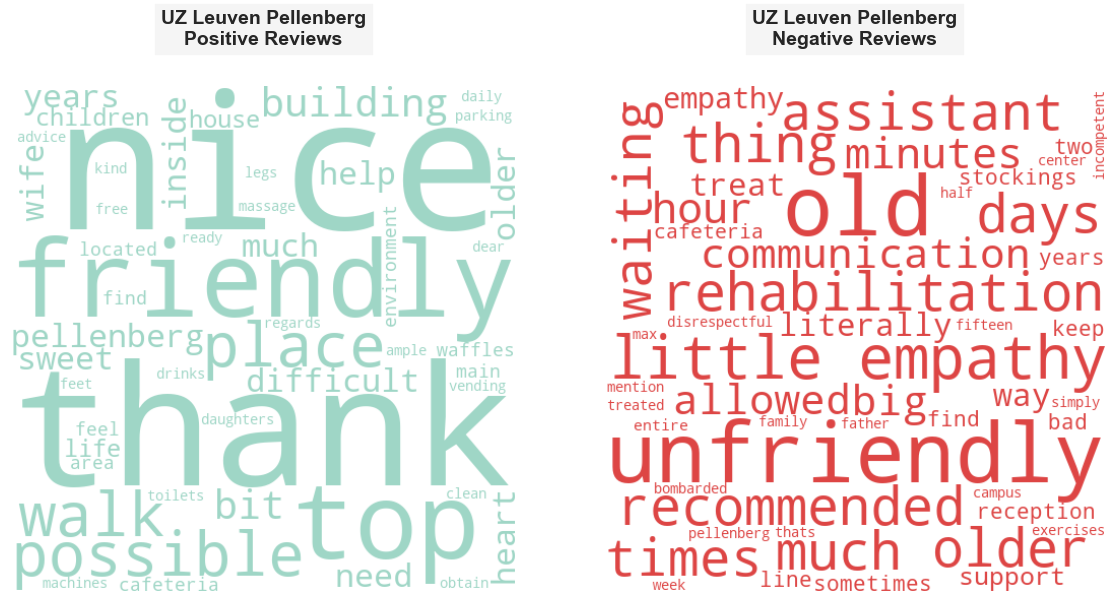

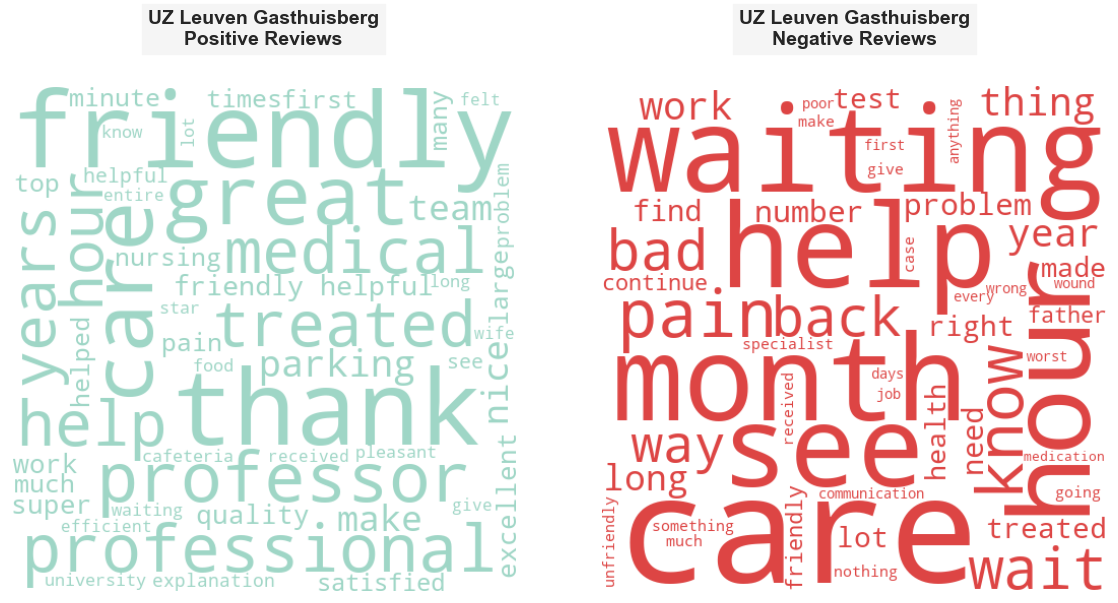

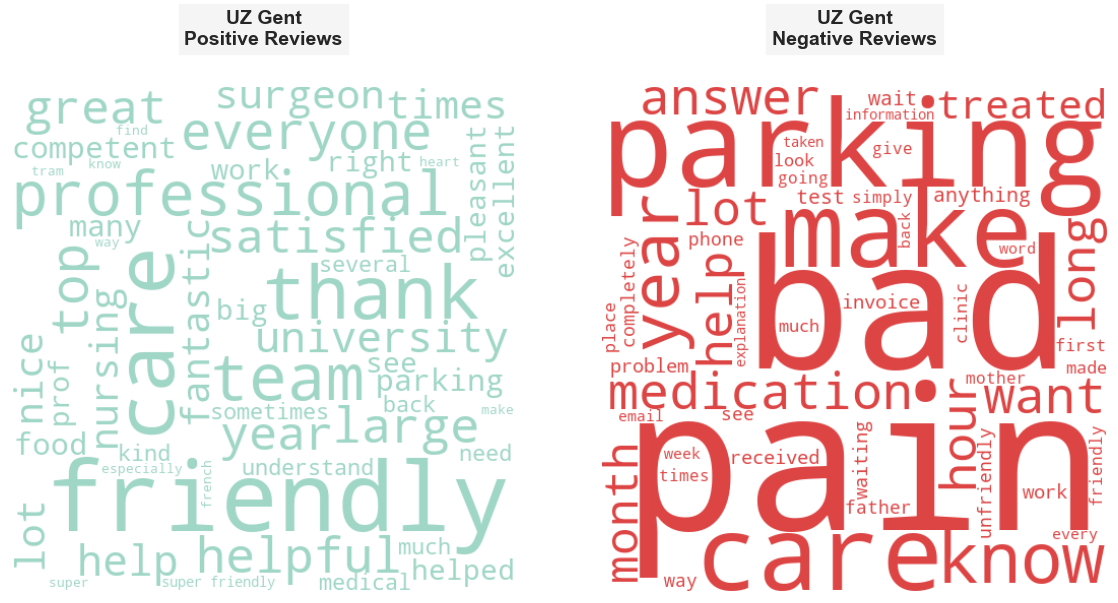

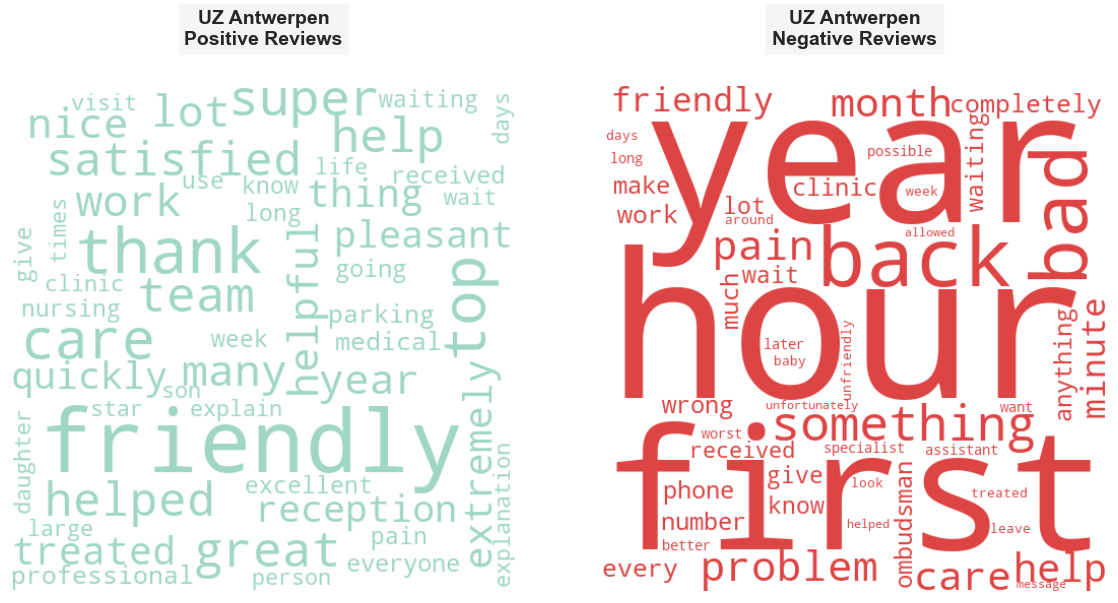

In [9]:
hospitals = df['hospital'].unique()

custom_palette = {
    'negative': '#DD4544',
    'neutral':  '#E6C358',
    'positive': '#9FD6C6'
}

for hospital in hospitals:
    pos_text = get_text(hospital, 'positive', custom_stopwords_wordcloud)
    neg_text = get_text(hospital, 'negative', custom_stopwords_wordcloud)
    
    wc_pos = WordCloud(width=500, height=500, background_color='white', colormap='Greens', max_words=50).generate(pos_text)
    wc_pos.recolor(color_func=single_color_func(custom_palette['positive']))

    wc_neg = WordCloud(width=500, height=500, background_color='white', colormap='Reds', max_words=50).generate(neg_text)
    wc_neg.recolor(color_func=single_color_func(custom_palette['negative']))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title(f"{hospital}\nPositive Reviews", 
                      fontsize=14, fontweight='bold',
                      pad=30, backgroundcolor='whitesmoke')
    
    axes[1].imshow(wc_neg, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title(f"{hospital}\nNegative Reviews", 
                      fontsize=14, fontweight='bold', 
                      pad=30, backgroundcolor='whitesmoke')
    plt.tight_layout()
    plt.show()

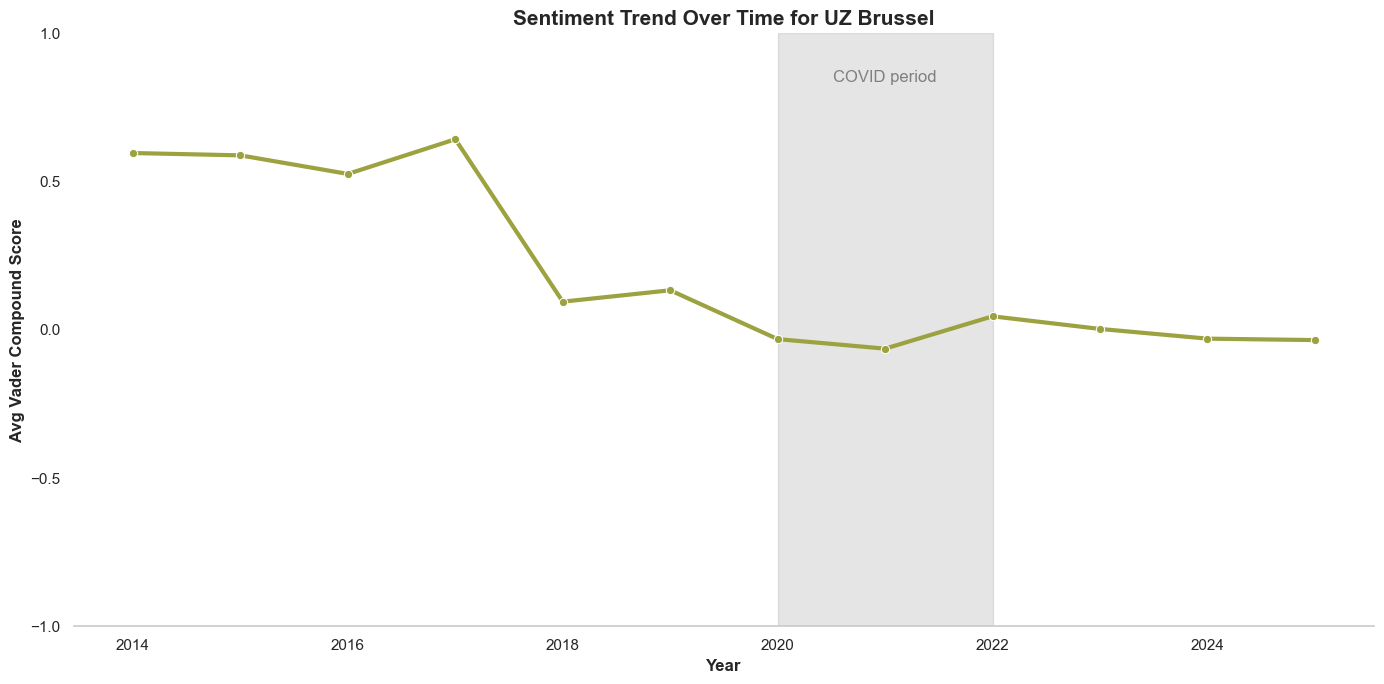

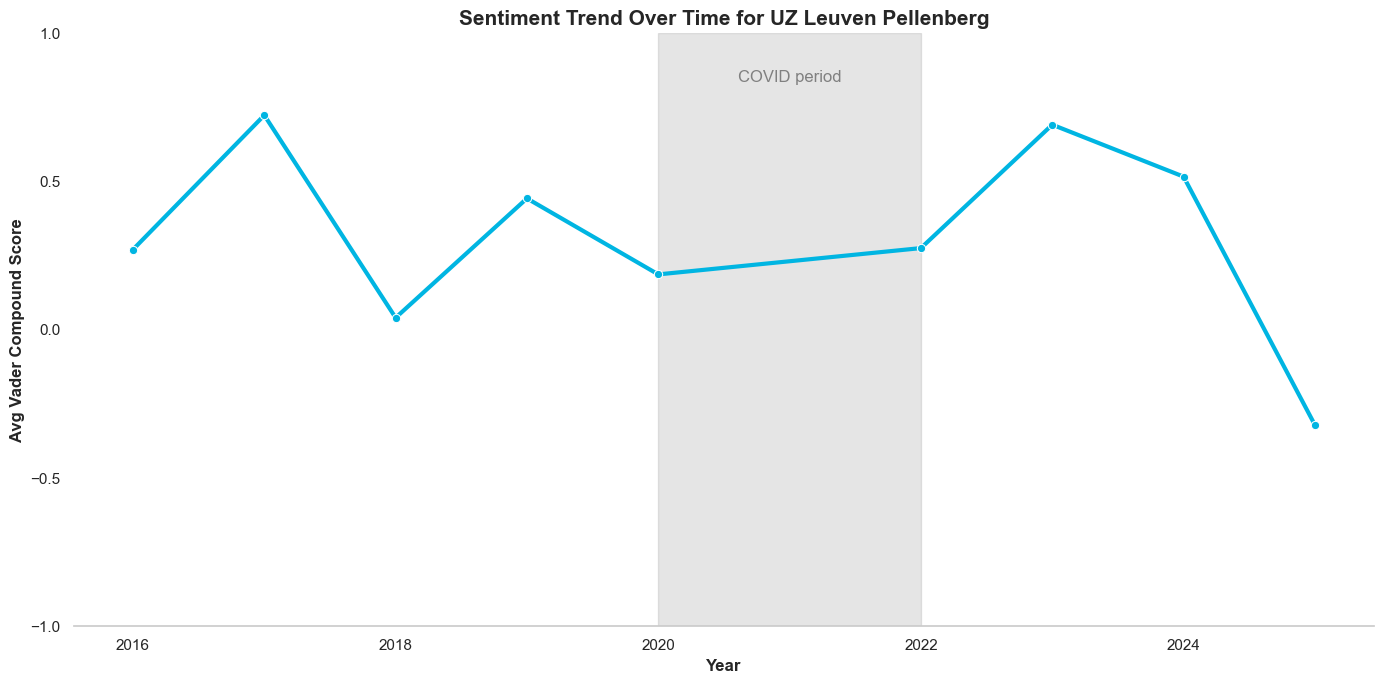

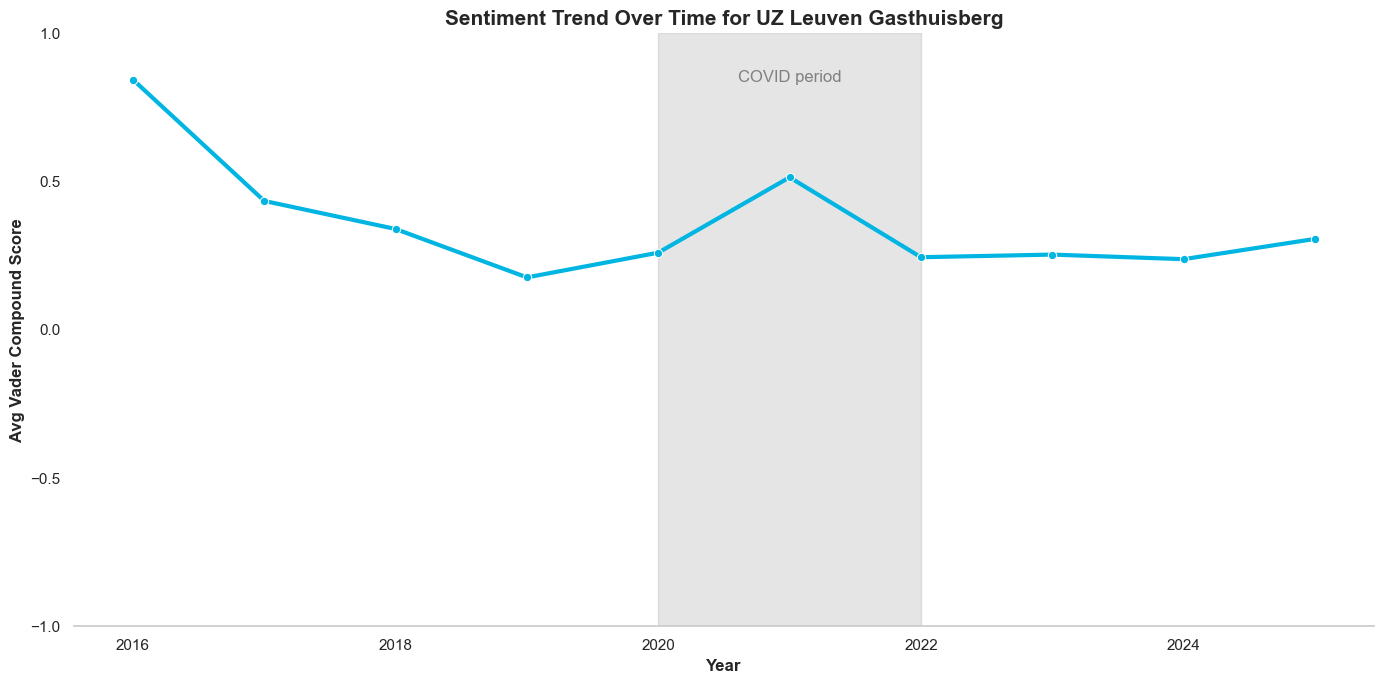

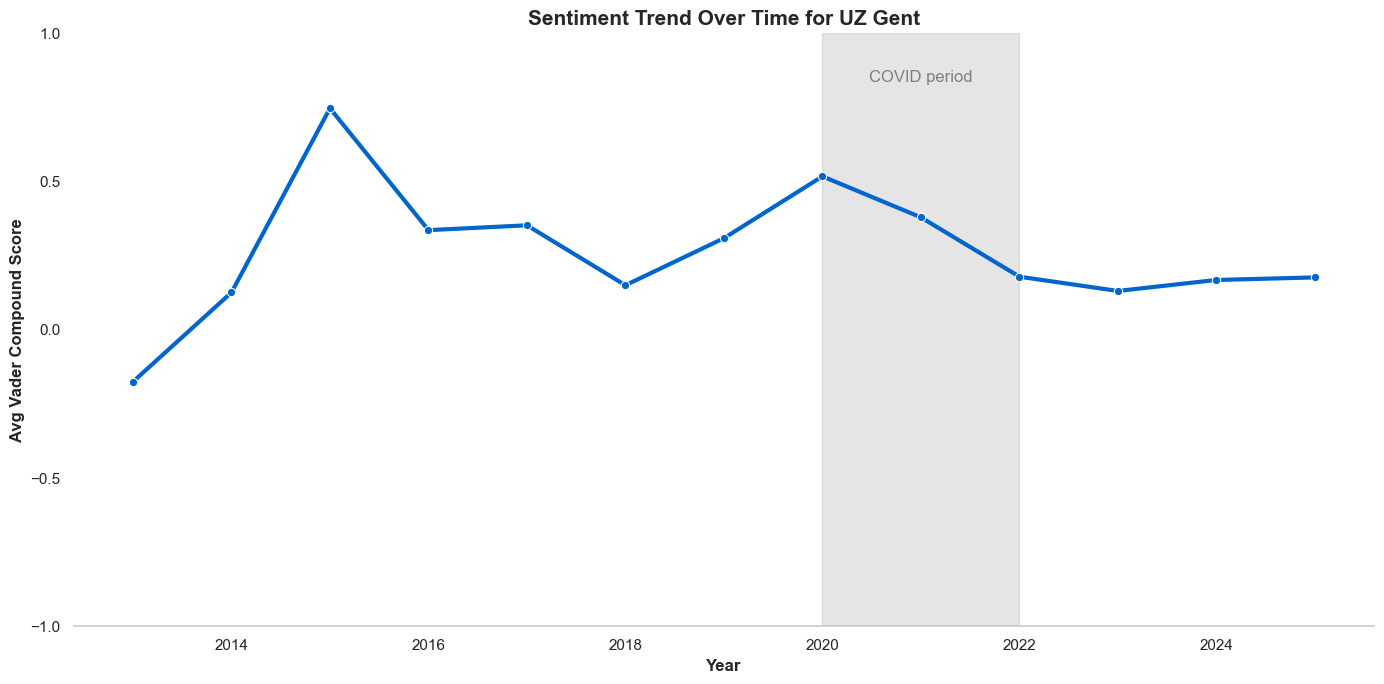

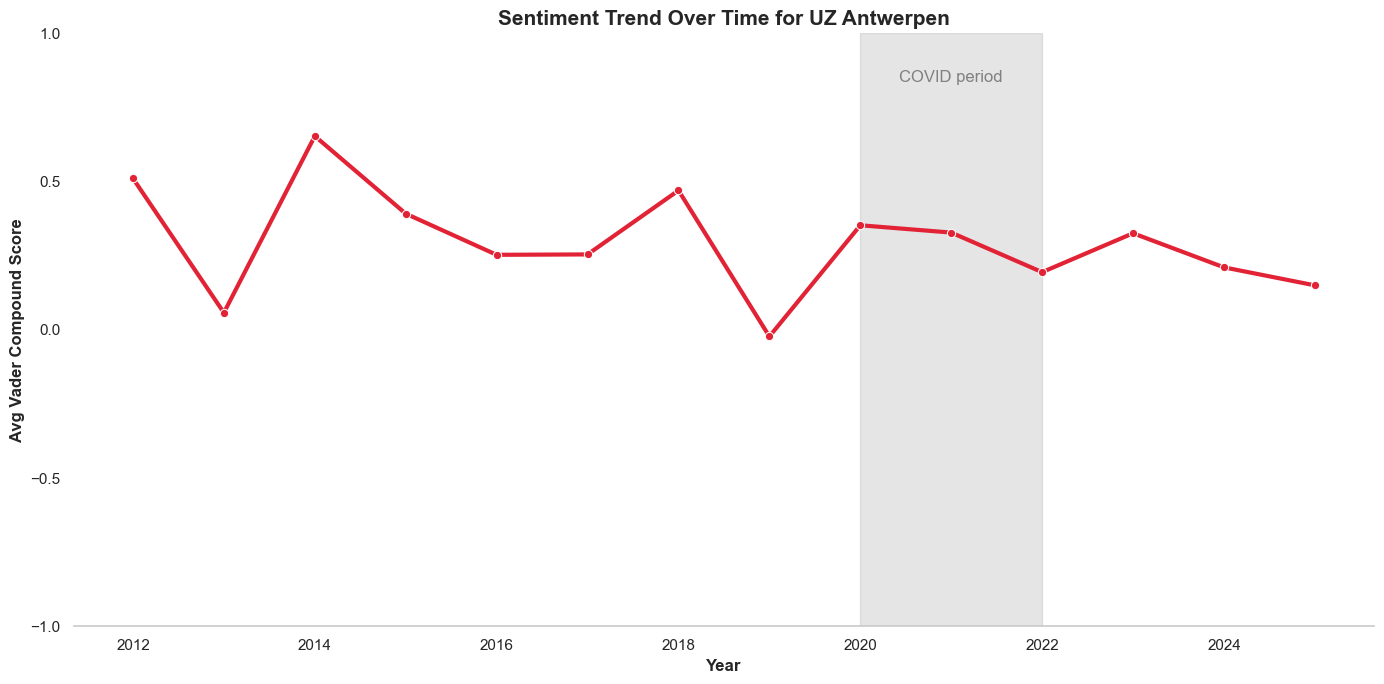

In [73]:
hospital_color = {
    "UZ Leuven Gasthuisberg": "#00B5E2",
    "UZ Leuven Pellenberg": "#00B5E2",
    "UZ Gent": "#0066CC",
    "UZ Antwerpen": "#E22335",
    "UZ Brussel": "#9BA23F"
}

hospitals = df['hospital'].unique()

for hospital_name in hospitals:
    hospital_df = df.loc[df['hospital'] == hospital_name]
    
    df_grouped = hospital_df.groupby('year').agg(
        avg_vader=('vader_compound', 'mean'),
        n_reviews=('vader_compound', 'count')
        ).reset_index()

    color_hex = hospital_color.get(hospital_name, "#000000")

    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_grouped, x='year', y='avg_vader', marker='o', color=color_hex, legend=False, linewidth=3)

    plt.axvspan(2020, 2022, color='gray', alpha=0.2)
    plt.text(2021, 0.85, "COVID period", color='gray', fontsize=12, ha='center', va='center')

    plt.title(f"Sentiment Trend Over Time for {hospital_name}", fontsize=15, fontweight='bold')
    plt.xlabel("Year", fontsize=12, fontweight='bold')
    plt.ylabel("Avg Vader Compound Score", fontsize=12, fontweight='bold')
    plt.yticks([-1, -0.5, 0, 0.5, 1])
    plt.ylim(-1, 1)

    ax = plt.gca()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

In [70]:
df['original_language'].value_counts()

original_language
Dutch             1050
French             479
English            247
Arabic              12
Polish              10
Romanian             7
Russian              5
German               3
Spanish              3
Italian              2
Greek                1
Portuguese           1
Uzbek                1
Albanian             1
Slovak               1
Chinese              1
Ukrainian            1
Afrikaans            1
Vietnamese           1
Czech                1
Haitian Creole       1
Turkish              1
Name: count, dtype: int64

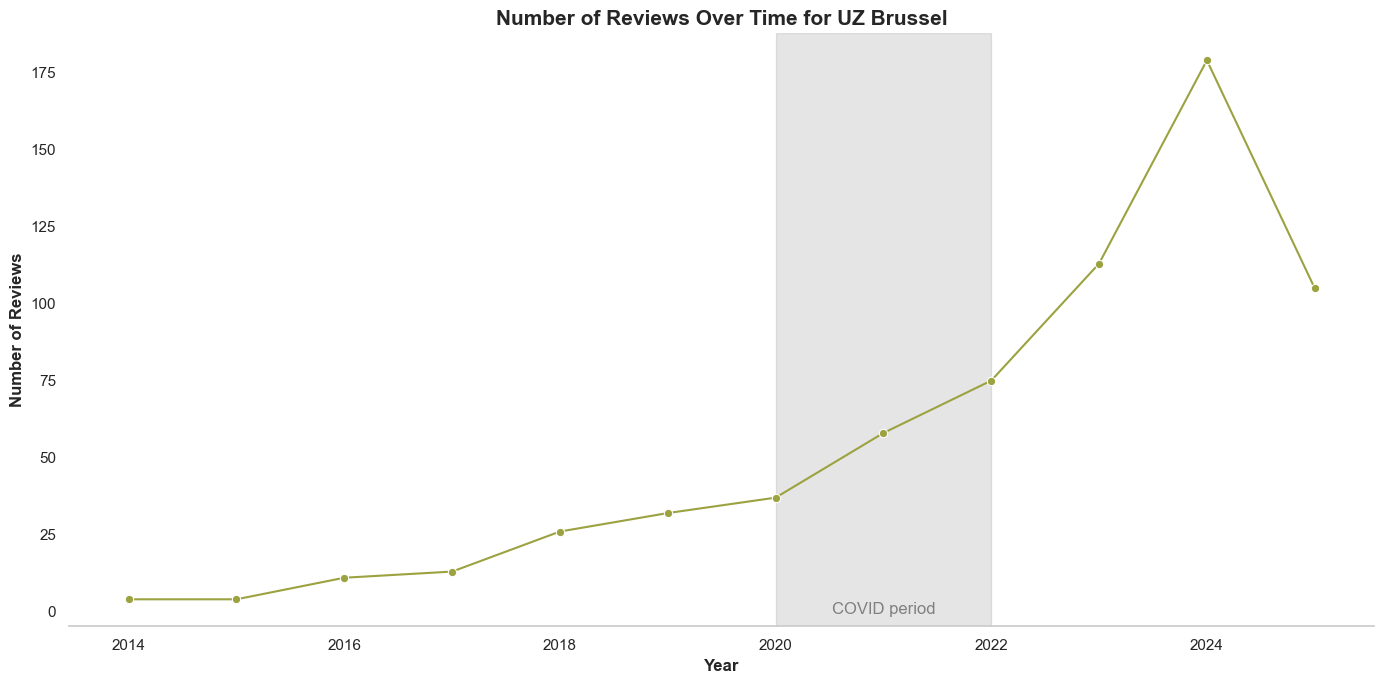

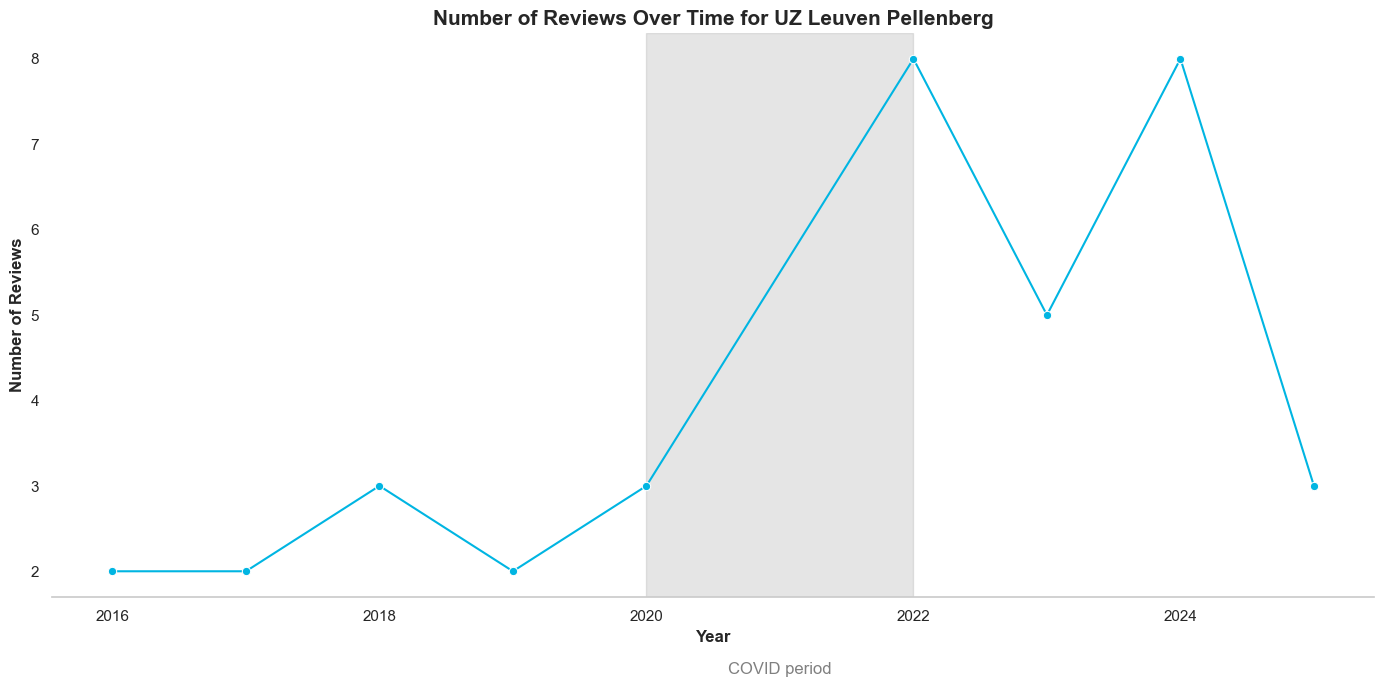

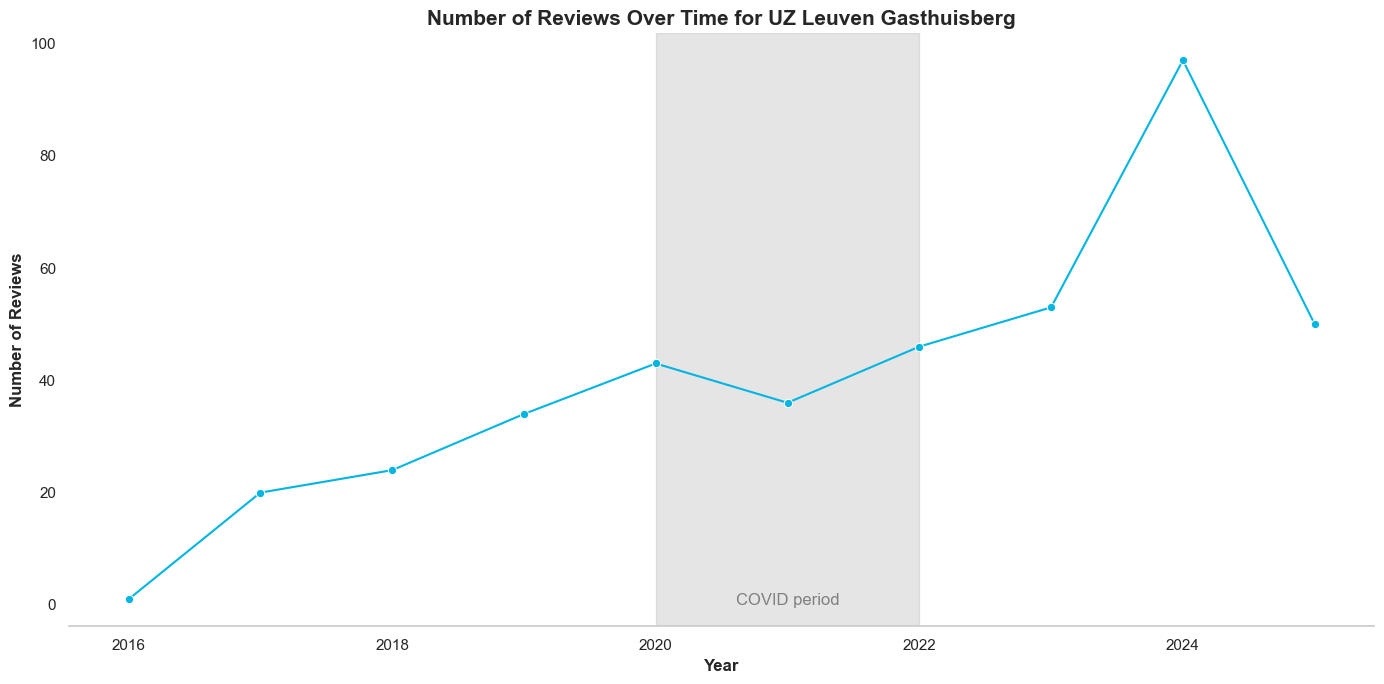

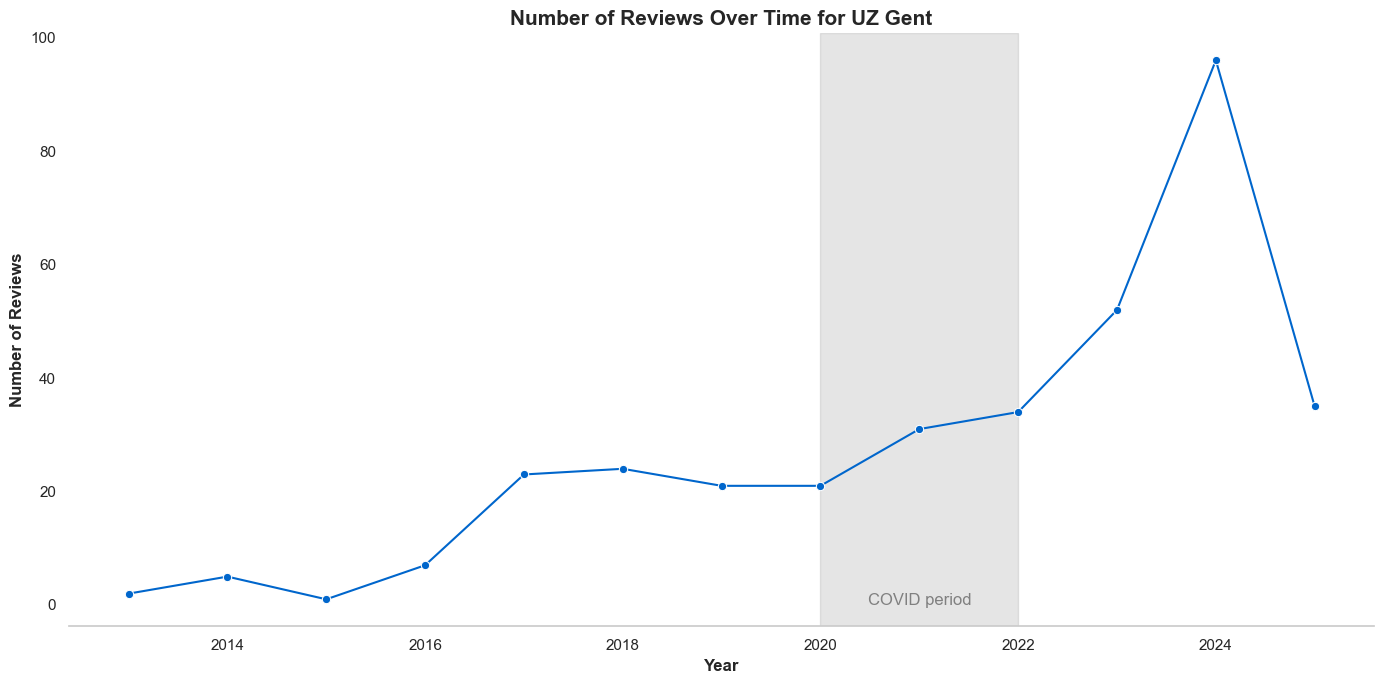

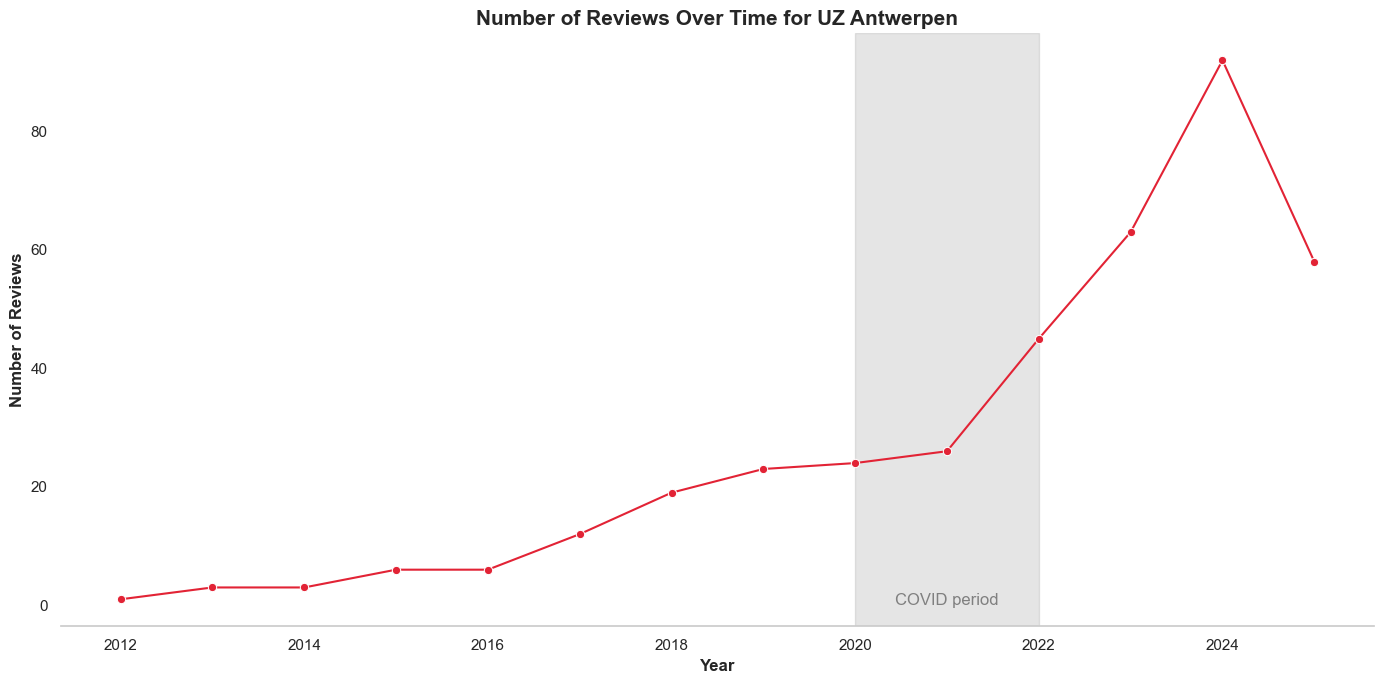

In [74]:
hospital_color = {
    "UZ Leuven Gasthuisberg": "#00B5E2",
    "UZ Leuven Pellenberg": "#00B5E2",
    "UZ Gent": "#0066CC",
    "UZ Antwerpen": "#E22335",
    "UZ Brussel": "#9BA23F"
}

hospitals = df['hospital'].unique()

for hospital_name in hospitals:
    hospital_df = df.loc[df['hospital'] == hospital_name]
    
    df_grouped = hospital_df.groupby(['year', 'hospital']).size().reset_index(name='n_reviews')

    color_hex = hospital_color.get(hospital_name, "#000000")

    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_grouped, x='year', y='n_reviews', marker='o', color=color_hex, legend=False)

    plt.axvspan(2020, 2022, color='gray', alpha=0.2)
    plt.text(2021, 0.85, "COVID period", color='gray', fontsize=12, ha='center', va='center')


    plt.title(f"Number of Reviews Over Time for {hospital_name}", fontsize=15, fontweight='bold')
    plt.xlabel("Year", fontsize=12, fontweight='bold')
    plt.ylabel("Number of Reviews", fontsize=12, fontweight='bold')

    ax = plt.gca()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

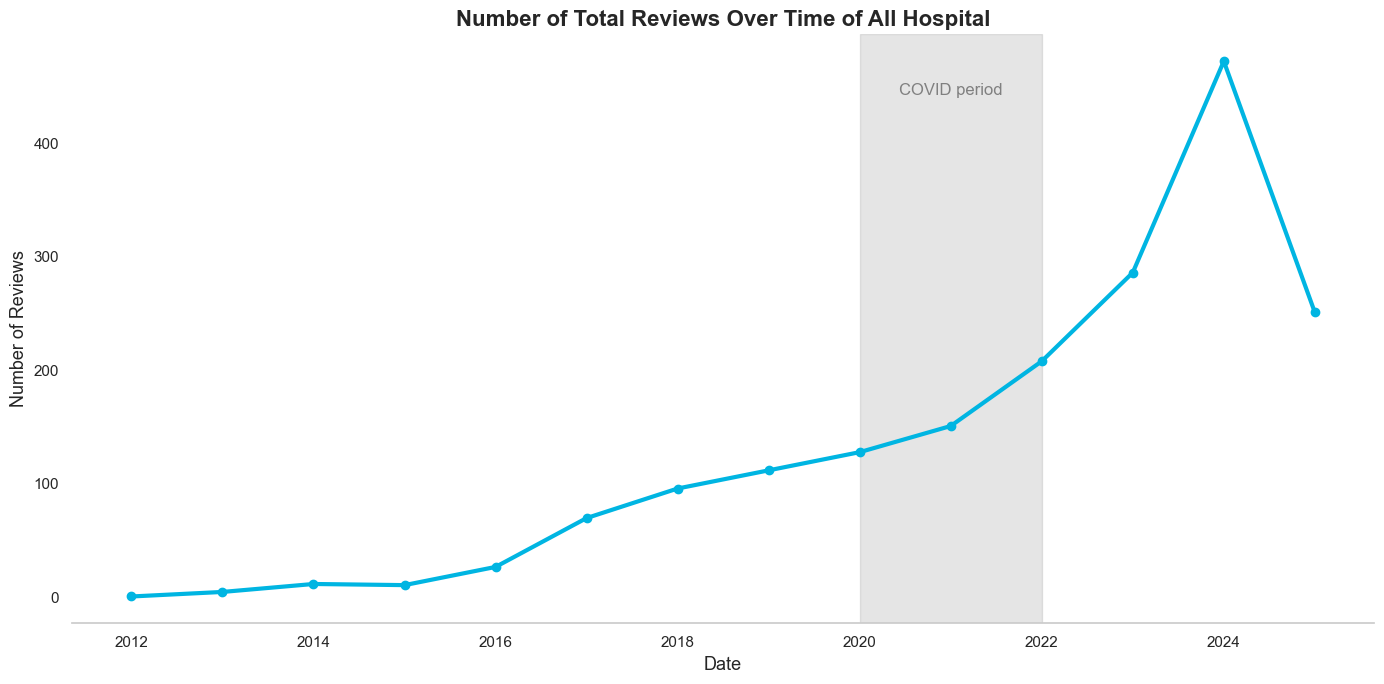

In [64]:
df_grouped = df.groupby('year').size().reset_index(name='n_reviews')

plt.figure(figsize=(14, 7))

plt.plot(df_grouped['year'], df_grouped['n_reviews'], marker='o', label=hospital_name, color=color, linewidth=3)

plt.title("Number of Total Reviews Over Time of All Hospital", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Reviews", fontsize=13)

plt.axvspan(2020, 2022, color='gray', alpha=0.2)
plt.text(2021, plt.ylim()[1] * 0.9, "COVID period", color='gray', fontsize=12, ha='center', va='center')

ax = plt.gca()
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

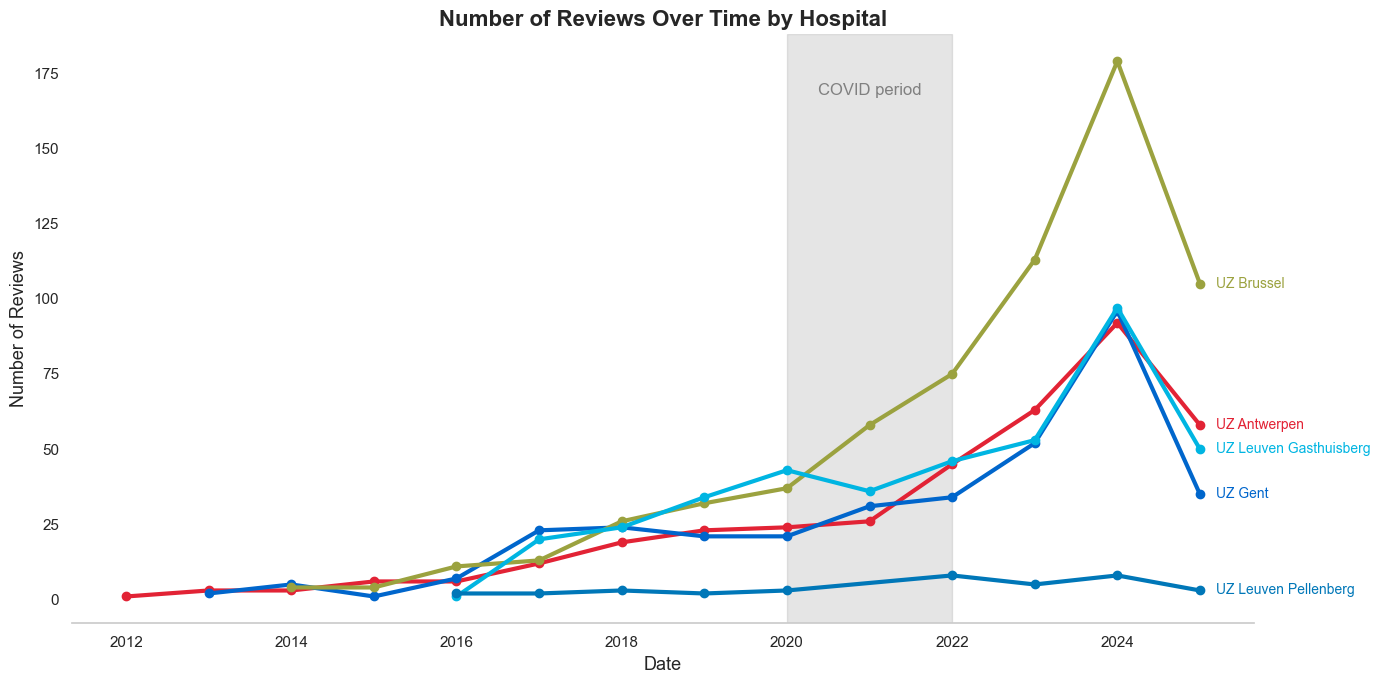

In [53]:
df_grouped = df.groupby(['year', 'hospital']).size().reset_index(name='n_reviews')

hospital_color = {
    "UZ Leuven Gasthuisberg": "#00B5E2",
    "UZ Leuven Pellenberg": "#0077B8",
    "UZ Gent": "#0066CC",
    "UZ Antwerpen": "#E22335",
    "UZ Brussel": "#9BA23F"
}

plt.figure(figsize=(14, 7))

for hospital_name in df_grouped['hospital'].unique():
    hospital_df = df_grouped[df_grouped['hospital'] == hospital_name]
    color = hospital_color.get(hospital_name, "#333333")
    plt.plot(hospital_df['year'], hospital_df['n_reviews'], marker='o', label=hospital_name, color=color, linewidth=3)

    plt.text(
        hospital_df['year'].max() + 0.2, 
        hospital_df['n_reviews'].iloc[-1], 
        hospital_name,
        fontsize=10,
        va='center',
        color=color
    )

plt.title("Number of Reviews Over Time by Hospital", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Reviews", fontsize=13)

plt.axvspan(2020, 2022, color='gray', alpha=0.2)
plt.text(2021, plt.ylim()[1] * 0.9, "COVID period", color='gray', fontsize=12, ha='center', va='center')

ax = plt.gca()
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


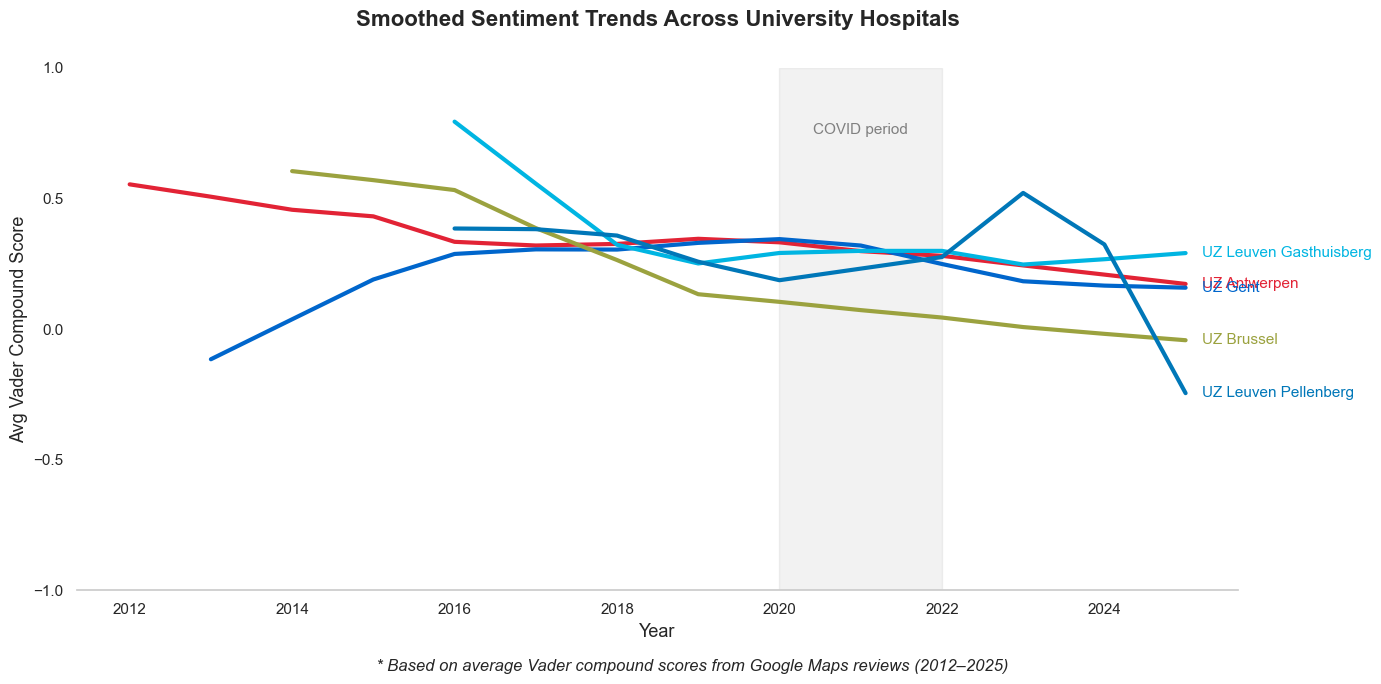

In [36]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(14, 7))

for hospital_name in df_grouped['hospital'].unique():
    hospital_df = df_grouped[df_grouped['hospital'] == hospital_name]
    color = hospital_color.get(hospital_name, "#333333")

    # Smoothed trend line only
    lowess = sm.nonparametric.lowess(hospital_df['avg_vader'], hospital_df['year'], frac=0.5)
    plt.plot(lowess[:, 0], lowess[:, 1], color=color, linewidth=3)

    # Annotate at end
    plt.text(
        hospital_df['year'].max() + 0.2,
        lowess[-1, 1],
        hospital_name,
        fontsize=11,
        va='center',
        color=color
    )

# Optional: subtle COVID shading
plt.axvspan(2020, 2022, color='gray', alpha=0.1)
plt.text(2021, plt.ylim()[1]*0.9, "COVID period", color='gray', fontsize=11, ha='center', va='center')

# Title
plt.title("Smoothed Sentiment Trends Across University Hospitals", fontsize=16, fontweight='bold', pad=30)
plt.suptitle("* Based on average Vader compound scores from Google Maps reviews (2012–2025)", fontsize=12, style='italic', y=0)

plt.xlabel("Year", fontsize=13)
plt.ylabel("Avg Vader Compound Score", fontsize=13)
plt.ylim(-1, 1)
plt.yticks([-1, -0.5, 0, 0.5, 1])

# Style
ax = plt.gca()
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

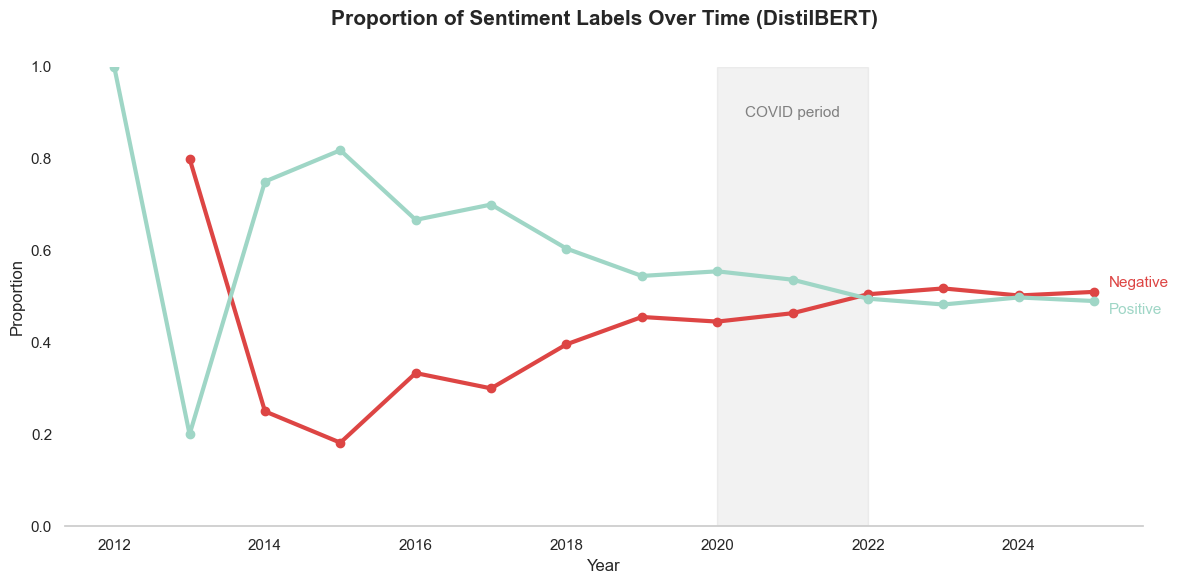

In [51]:
yearly_counts = df.groupby(['year', 'distilbert_label']).size().reset_index(name='count')
total_per_year = df.groupby('year').size().reset_index(name='total')
yearly_counts = yearly_counts.merge(total_per_year, on='year')
yearly_counts['prop'] = yearly_counts['count'] / yearly_counts['total']

plt.figure(figsize=(12, 6))

offsets = {'negative': 0.02, 'positive': -0.02}

for label, color in zip(['negative', 'positive'], ['#DD4544', '#9FD6C6']):
    df_label = yearly_counts[yearly_counts['distilbert_label'] == label]
    plt.plot(df_label['year'], df_label['prop'], marker='o', label=label.capitalize(), color=color, linewidth=3)

    offset = offsets.get(label, 0)
    plt.text(
        df_label['year'].max() + 0.2,
        df_label['prop'].iloc[-1] + offset,
        label.capitalize(),
        fontsize=11,
        va='center',
        color=color
    )

plt.title("Proportion of Sentiment Labels Over Time (DistilBERT)", fontsize=15, fontweight='bold', pad=30)
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.ylim(0, 1)

plt.axvspan(2020, 2022, color='gray', alpha=0.1)
plt.text(2021, plt.ylim()[1]*0.9, "COVID period", color='gray', fontsize=11, ha='center', va='center')

ax = plt.gca()
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

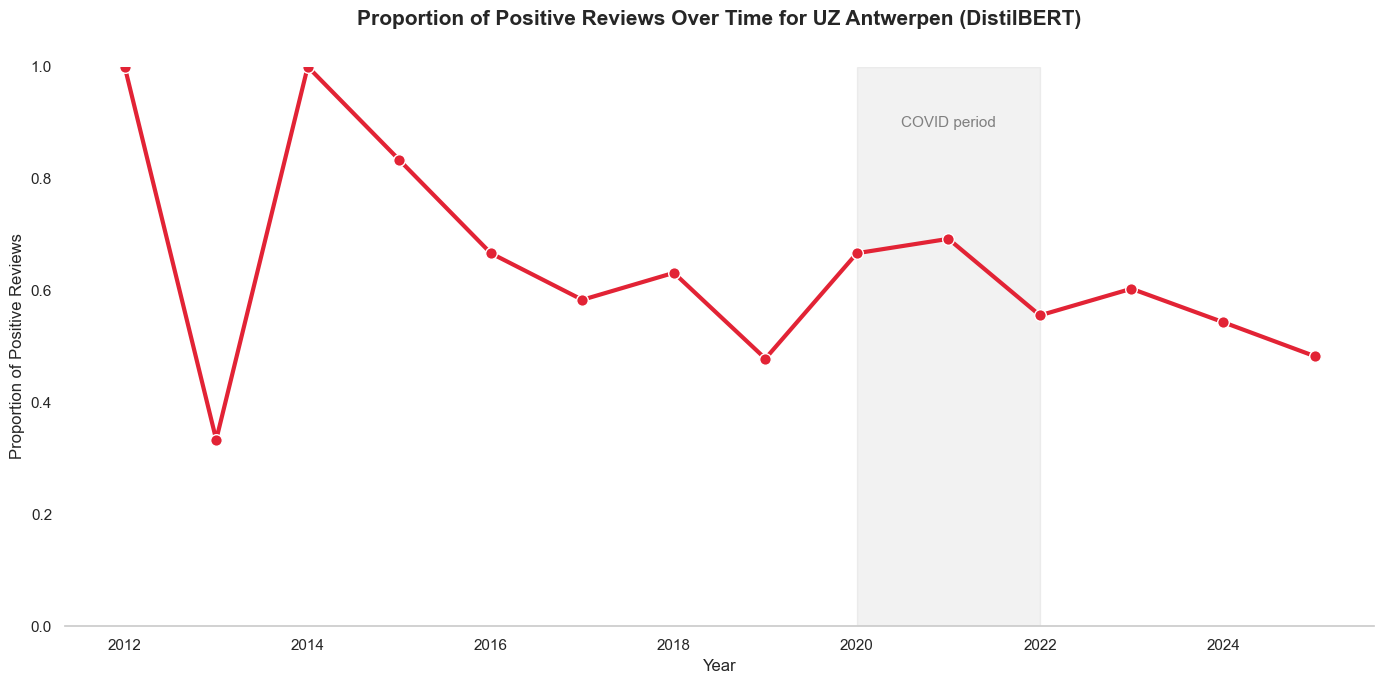

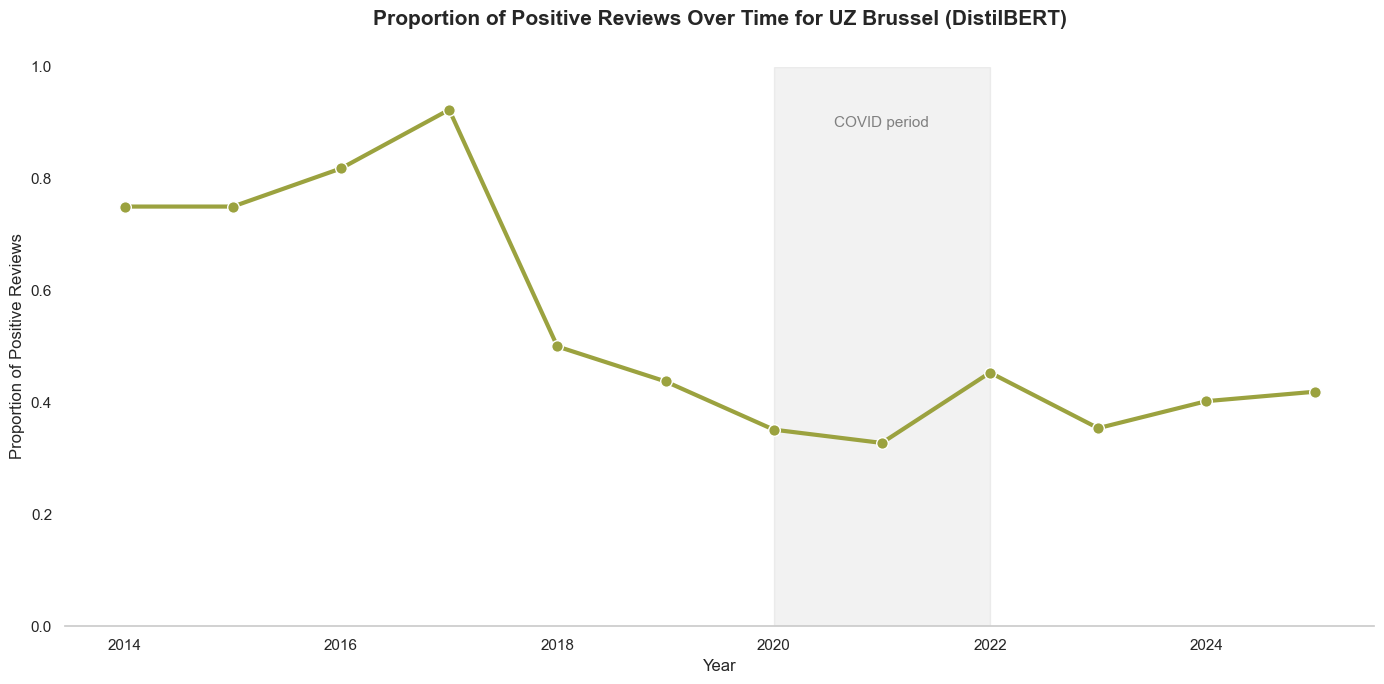

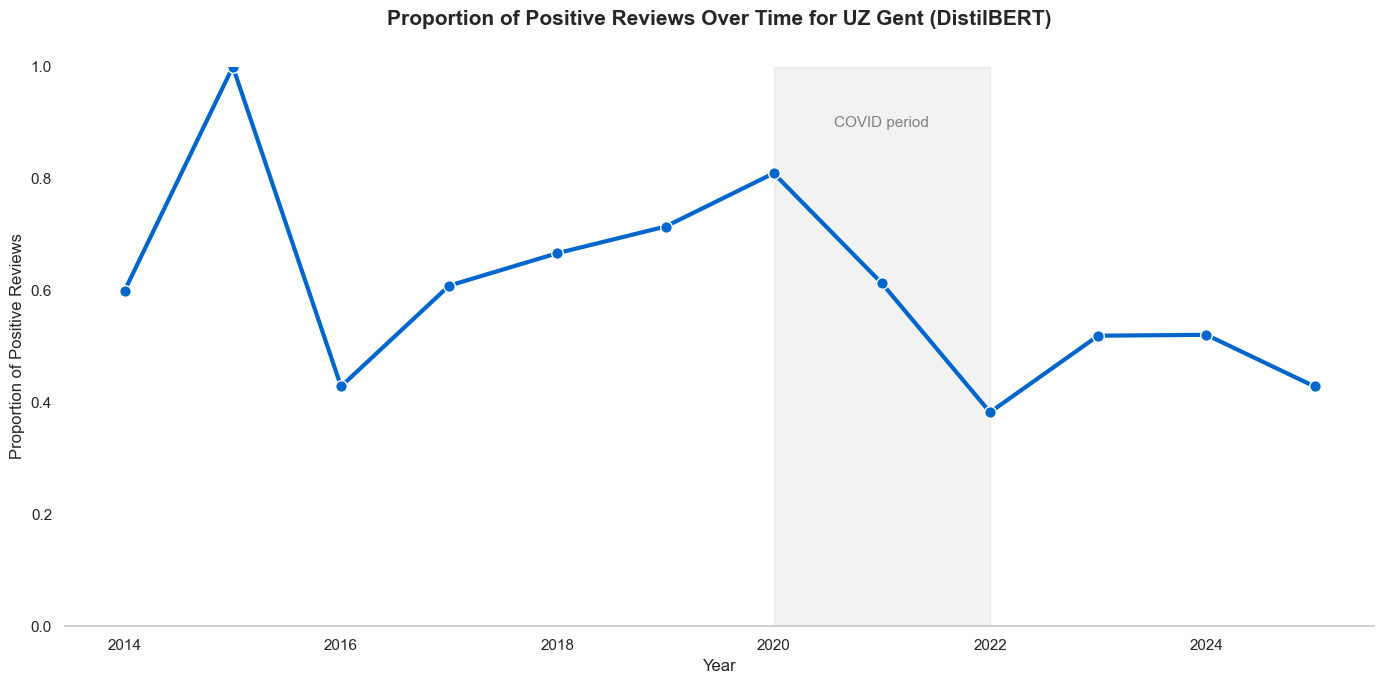

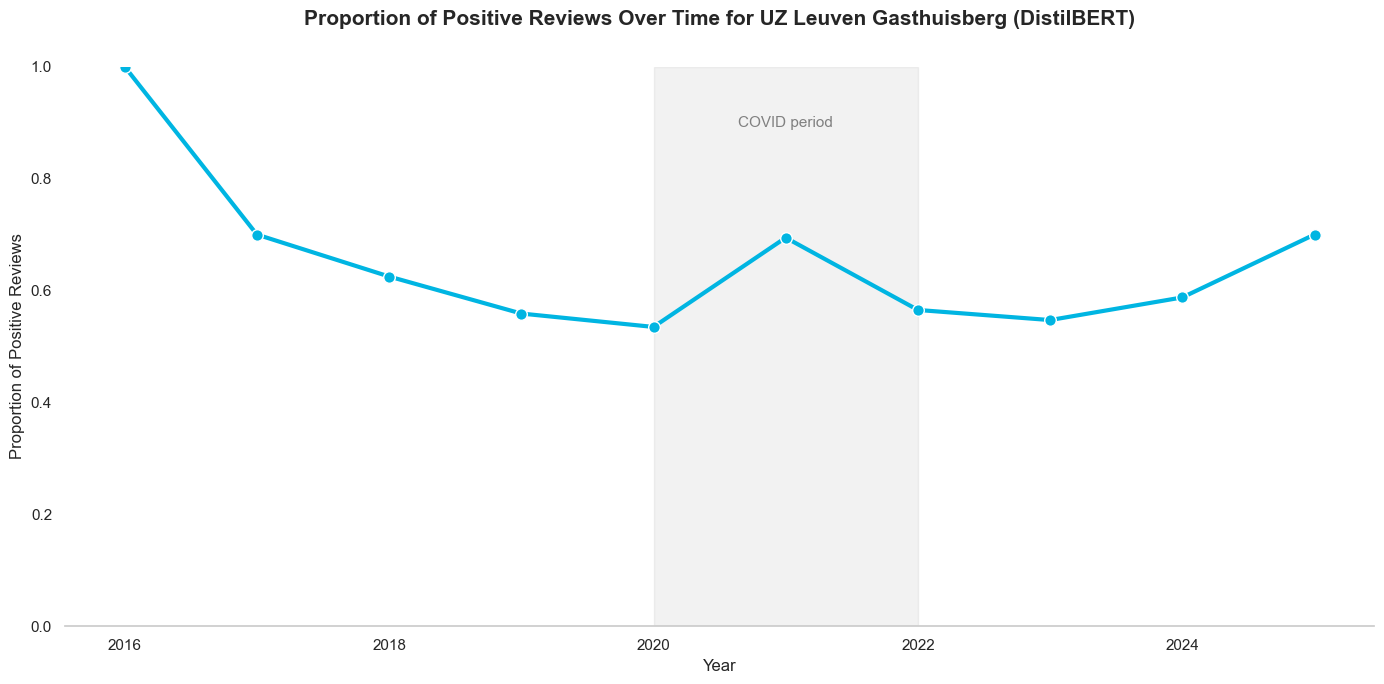

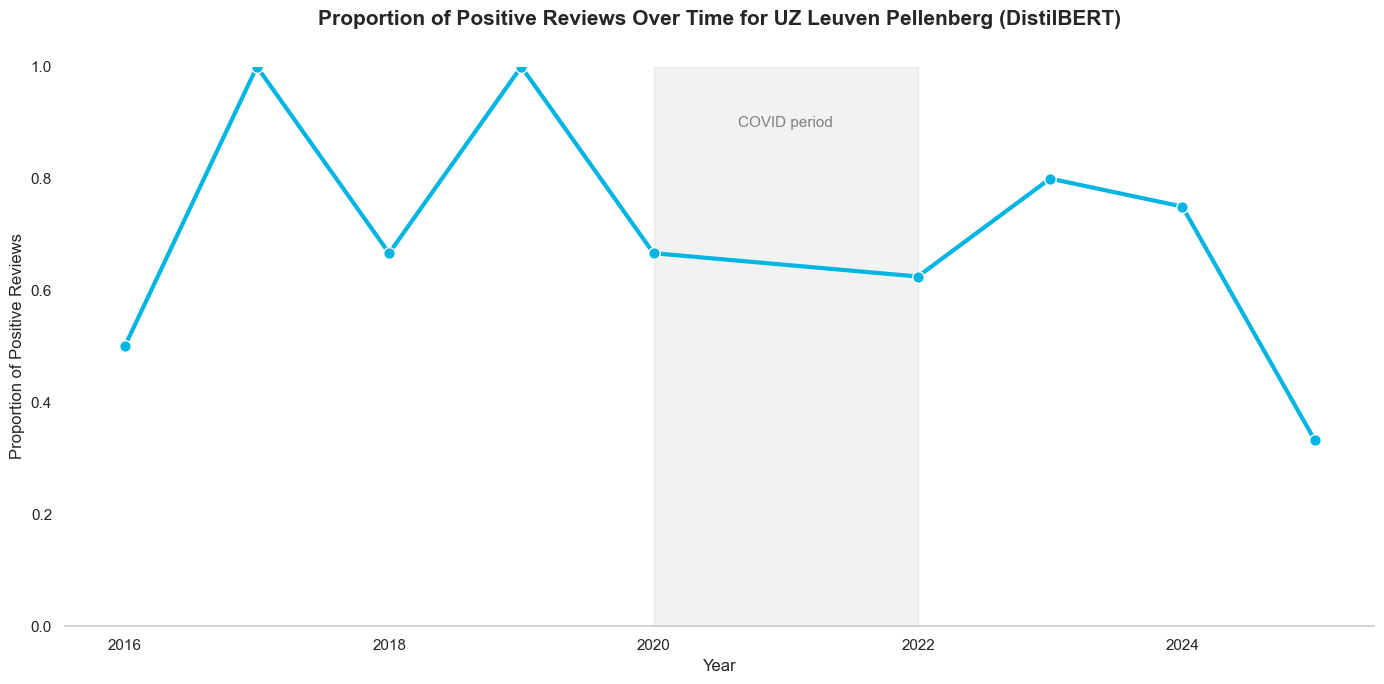

In [ ]:
df_positive = df[df['distilbert_label'] == 'positive']
yearly_counts = df_positive.groupby(['year', 'hospital']).size().reset_index(name='count')

total_per_year = df.groupby(['year', 'hospital']).size().reset_index(name='total')
yearly_counts = yearly_counts.merge(total_per_year, on=['year', 'hospital'])
yearly_counts['prop'] = yearly_counts['count'] / yearly_counts['total']

hospital_color = {
    "UZ Leuven Gasthuisberg": "#00B5E2",
    "UZ Leuven Pellenberg": "#00B5E2",
    "UZ Gent": "#0066CC",
    "UZ Antwerpen": "#E22335",
    "UZ Brussel": "#9BA23F"
}

for hospital_name in yearly_counts['hospital'].unique():
    df_hosp = yearly_counts[yearly_counts['hospital'] == hospital_name]
    color = hospital_color.get(hospital_name, "#333333")

    plt.figure(figsize=(14, 7))
    
    plt.plot(
        df_hosp['year'],
        df_hosp['prop'],
        marker='o',
        color=color,
        linewidth=3,
        markersize=7,
        markerfacecolor=color,
        markeredgewidth=2,
        markeredgecolor='white'
    )

    plt.title(f"Proportion of Positive Reviews Over Time for {hospital_name} (DistilBERT)", fontsize=15, fontweight='bold', pad=30)
    plt.xlabel("Year")
    plt.ylabel("Proportion of Positive Reviews")
    plt.ylim(0, 1)

    plt.axvspan(2020, 2022, color='gray', alpha=0.1)
    plt.text(2021, plt.ylim()[1]*0.9, "COVID period", color='gray', fontsize=11, ha='center', va='center')

    ax = plt.gca()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()